# Objective :

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

# Step 1 :  Import Library and Dataset

In [86]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [87]:
# Read the data in
employee = pd.read_csv(r"C:\Users\Admin\Desktop\mchine learning\decision tree\churn.csv")

In [88]:
employee.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Step 2 : Data Pre-Processing

### Removing Irrelavent Variable

In [89]:
employee = employee.drop(['customerID'],axis=1)
employee.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Univariate Analysis

In [90]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [91]:
employee.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [92]:
employee['TotalCharges'] = employee["TotalCharges"].replace(" ",np.nan).astype(float) 

In [93]:
employee.TotalCharges.value_counts(dropna=False)

NaN        11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6531, dtype: int64

In [94]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Checking Missing Value

In [95]:
# Do we have NA's in data
employee.isna().sum()  ## is = check & as = convert

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Outlier

<Axes: >

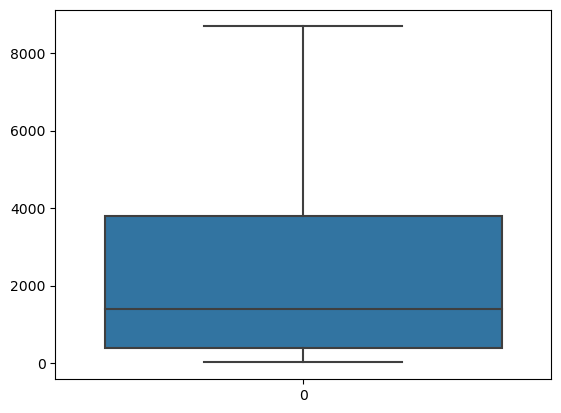

In [96]:
import seaborn as sns
sns.boxplot(data=employee.TotalCharges)

In [97]:
employee.TotalCharges.fillna(employee.TotalCharges.mean(),inplace = True) # one column at a time 

In [98]:
# Do we have NA's in data
employee.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [99]:
employee.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card,89.10,1949.40,No
7,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,No,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer,56.15,3487.95,No


# data manipulation/pre-processing

In [100]:
employee.OnlineSecurity.value_counts(ascending=False)

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [101]:
3498+1526

5024

In [102]:
employee.OnlineSecurity = employee.OnlineSecurity.replace({'No internet service' : 'No'})

In [103]:
employee.OnlineSecurity.value_counts()

No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64

In [104]:
employee.OnlineBackup = employee.OnlineBackup.replace({'No internet service' : 'No'})
employee.DeviceProtection = employee.DeviceProtection.replace({'No internet service' : 'No'})
employee.TechSupport = employee.TechSupport.replace({'No internet service' : 'No'})
employee.StreamingTV = employee.StreamingTV.replace({'No internet service' : 'No'})
employee.StreamingMovies = employee.StreamingMovies.replace({'No internet service' : 'No'})
employee.MultipleLines = employee.MultipleLines.replace({'No phone service' : 'No'})

# Churn Rate Analysis

In [105]:
employee.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [106]:
import plotly.express as px

fig = px.pie(employee,names='Churn',color='Churn',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

# Trend Analysis

In [107]:
employee.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [108]:
Churn_Customer = employee.loc[employee["Churn"] == "Yes",:]
Churn_Customer

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,No,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer,103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,No,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,No,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer,44.20,403.35,Yes
7032,Male,Yes,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,No,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card,102.95,6886.25,Yes


In [109]:
fig = px.sunburst(Churn_Customer, path=["SeniorCitizen",'InternetService',
                                        "Contract", "PaymentMethod"])
fig.show()

#### Conclusion :- Customer Trend Analysis 

* Customer who leave the service are 
* Citizen = Youth , Internet =  Fiber Optic & Month-to-Month &  Payment = Electronic Check 

### Taking subset data of Number 

In [110]:
# #Employee Numeric columns
employee_num = employee.select_dtypes(include=[np.number])
employee_num.head(3)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15


### Taking subset data of Category 

In [111]:
employee_dummies = employee.select_dtypes(include=['object'])
employee_dummies.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


### Converting Quality Variable to Number

### Combine to Dataset

In [112]:
employee_combined = pd.concat([employee_num, employee_dummies],axis=1)
employee_combined.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,29.85,29.85,Female,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,34,56.95,1889.50,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,2,53.85,108.15,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,45,42.30,1840.75,Male,No,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,No
4,2,70.70,151.65,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


#### EDA Completed

# Step 3: Data Partition

In [113]:
from sklearn.model_selection import train_test_split

x = employee_combined.drop(['Churn'],axis=1)
y = employee_combined[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=231)

# Step 4: Model Building

In [114]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()  # by default it use Gini index for split
dt.fit(X_train,y_train)  # Model = dt

ValueError: could not convert string to float: 'Female'

# Step 5: Plotting the Tree 

In [ ]:
train = pd.concat([y_train,X_train],axis=1)
train.head()

In [ ]:
independent_variable = list(train.columns[1:])
independent_variable

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

churn = ['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names = churn, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

# Step 6 : Predictions on Train Dataset

In [ ]:
train.head()

In [ ]:
train['Predicted'] = dt.predict(X_train)  # MODEL = dt
train.head()

# Step 7 : Model Performance Metrics

In [ ]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Churn'])
print(matrix)

#### Final accuracy of Model Before Pruning 

In [ ]:
Accuracy_Train=((3616+1306)/(4930)*100)
print(Accuracy_Train)   # overfit or High accuracy

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train['Churn'], train['Predicted']))

### Model Improvement by Pruning Method ( Cut Tree)

In [ ]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=120, ## child
                                 min_samples_split=200, #parent 
                                 max_depth=5)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

churn=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names = churn, # Yes , No
               filled = True, # colour
               node_ids = True, # node number
               fontsize=3); # 

### Strategy & Prediction
* Contract = Month-to-Month & Monthly Charges > 68 & Tenure <= 15.5 

In [ ]:
train['Predicted'] = dt.predict(X_train)  # MODEL = dt
train.head()

#### Final accuracy of Model after Pruning 

In [ ]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Churn'])
print(matrix)

In [ ]:
Accuracy_Train=((3305+667)/(4930)*100)
print(Accuracy_Train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train['Churn'], train['Predicted']))

# Step 8 : Predictions on Test Dataset

In [ ]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

In [ ]:
test['Predicted'] = dt.predict(X_test)
test.head()

# Step 9 : Model Performance Metrics on Test data 

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Churn'])
print(confusion_matrix)

In [ ]:
Accuracy_test=((1406+255)/(2113)*100)
Accuracy_test

# Sensitivity & Specificity

#### Train

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train['Churn'], train['Predicted']))

#### Test

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test['Churn'], test['Predicted']))

* 49% is accuracy of bad customer capture by model 
* 89% is accuracy of Good customer capture by model 

# Grid Search Method 

In [ ]:
params = { 'min_samples_split': [350,200,250,100], ## Parent 
           'min_samples_leaf': [120,50,100], ## Child or Leave 
           'max_depth':[3,4,5]}  # Branches

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

100,50,3  # first Combination
100,50,4  # Second Combination
100,50,6 # Third Combination
100,70,3 
100,70,4
100,70,6
150,30,4
150,30,5
150,30,6
150,50,4
150,50,5
150,50,6

In [ ]:
grid_search_cv.best_estimator_

# Finished

# Live Data

In [ ]:
Live_data = X_test.iloc[0:10,:]
Live_data

In [ ]:
Live_data['Predicted'] = dt.predict(Live_data)
Live_data

# Business Submission

In [ ]:
print(classification_report(train['Churn'], train['Predicted']))

# Model Export

In [ ]:
import pickle

pickle.dump(dt, open(r"C:\Users\Hp\Desktop\cloud\build.pkl",'wb'))  #model = dt # Exporting model from python to laptop

In [ ]:
X_train.head()

In [ ]:
employee.Partner.value_counts()